**Preprocessing**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/Heart Disease.csv'
data = pd.read_csv(file_path)
print(data)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [ ]:
df = data.sample(frac=1).reset_index(drop=True)
df.fillna(df.mean(), inplace=True)

In [ ]:
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   45        1.0              1        20.0     0.0   
1        0   62        1.0              0         0.0     0.0   
2        1   42        2.0              0         0.0     0.0   
3        0   53        2.0              1        20.0     0.0   
4        1   46        4.0              1        45.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     0   58        1.0              0         0.0     0.0   
4234     0   59        1.0              0         0.0     0.0   
4235     1   59        1.0              1        43.0     0.0   
4236     1   54        4.0              0         0.0     0.0   
4237     1   53        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             1         0    256.0  144.0   96.0  26.60   
1                   0             1         0    240.0  154.0

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
num_rows = len(df)
train_end = int(num_rows * 0.70)
val_end = train_end + int(num_rows * 0.15)

x_train = x[:train_end]
y_train= y[:train_end]
x_val = x[train_end:val_end]
y_val = y[train_end:val_end]
x_test = x[val_end:]
y_test = y[val_end:]

In [ ]:
x_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,45,1.0,1,20.0,0.0,0,1,0,256.0,144.0,96.0,26.60,75.0,83.0
1,0,62,1.0,0,0.0,0.0,0,1,0,240.0,154.0,92.0,29.49,55.0,67.0
2,1,42,2.0,0,0.0,0.0,0,1,0,164.0,141.5,98.0,32.52,72.0,76.0
3,0,53,2.0,1,20.0,0.0,0,0,0,262.0,127.5,86.0,24.11,87.0,73.0
4,1,46,4.0,1,45.0,0.0,0,0,0,209.0,112.5,65.0,27.48,75.0,78.0


In [ ]:
y_train.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values
x_val=x_val.values
y_val=y_val.values

In [ ]:
X_train = x_train.T
Y_train = y_train.reshape(1, X_train.shape[1])

X_test = x_test.T
Y_test = y_test.reshape(1, X_test.shape[1])

X_val=x_val.T
Y_val=y_val.reshape(1,X_val.shape[1])

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)
print("Shape of X_val:" , X_val.shape)
print("Shape of Y_val:" , Y_val.shape)

Shape of X_train :  (15, 2966)
Shape of Y_train :  (1, 2966)
Shape of X_test :  (15, 637)
Shape of Y_test :  (1, 637)
Shape of X_val: (15, 635)
Shape of Y_val: (1, 635)


**Part A**

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    return round(acc, 2)

In [ ]:
def model(X_train, Y_train, X_val, Y_val, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.random.uniform(-1, 1, size=(n, 1))

    B = 0

    cost_train_list = []
    cost_val_list = []
    acc_train_list = []
    acc_val_list = []

    for i in range(iterations):
        Z_train = np.dot(W.T, X_train) + B
        A_train = sigmoid(Z_train)
        epsilon = 1e-15
        A_train = np.clip(A_train, epsilon, 1 - epsilon)
        cost_train = -(1 / m) * np.sum(Y_train * np.log(A_train) + (1 - Y_train) * np.log(1 - A_train))

        dW = (1 / m) * np.dot(A_train - Y_train, X_train.T)
        dB = (1 / m) * np.sum(A_train - Y_train)

        W -= learning_rate * dW.T
        B -= learning_rate * dB

        cost_train_list.append(cost_train)
        acc_train_list.append(accuracy(X_train, Y_train, W, B))

        Z_val = np.dot(W.T, X_val) + B
        A_val = sigmoid(Z_val)
        A_val = np.clip(A_val, epsilon, 1 - epsilon)
        cost_val = -(1 / X_val.shape[1]) * np.sum(Y_val * np.log(A_val) + (1 - Y_val) * np.log(1 - A_val))
        cost_val_list.append(cost_val)
        acc_val_list.append(accuracy(X_val, Y_val, W, B))

        if i % (iterations // 10) == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Validation cost = {cost_val}")

    return W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list

In [ ]:
iterations = 10000
learning_rate = 1.5/iterations
W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list = model(X_train, Y_train, X_val, Y_val, learning_rate, iterations)

Iteration 0: Training cost = 29.27595888224712, Validation cost = 29.25959798040565
Iteration 1000: Training cost = 2.052445889014988, Validation cost = 2.072092925267603
Iteration 2000: Training cost = 0.9915482458104478, Validation cost = 1.043960806586535
Iteration 3000: Training cost = 0.679364822975846, Validation cost = 0.7108841242235102
Iteration 4000: Training cost = 0.5342520359820081, Validation cost = 0.5466817347582669
Iteration 5000: Training cost = 0.4832928893730513, Validation cost = 0.4897676614233995
Iteration 6000: Training cost = 0.46695612594704144, Validation cost = 0.4718105359108749
Iteration 7000: Training cost = 0.4592621017370352, Validation cost = 0.46377467688504215
Iteration 8000: Training cost = 0.45416704046374995, Validation cost = 0.45879229931942267
Iteration 9000: Training cost = 0.45030184979847915, Validation cost = 0.4551525267165079


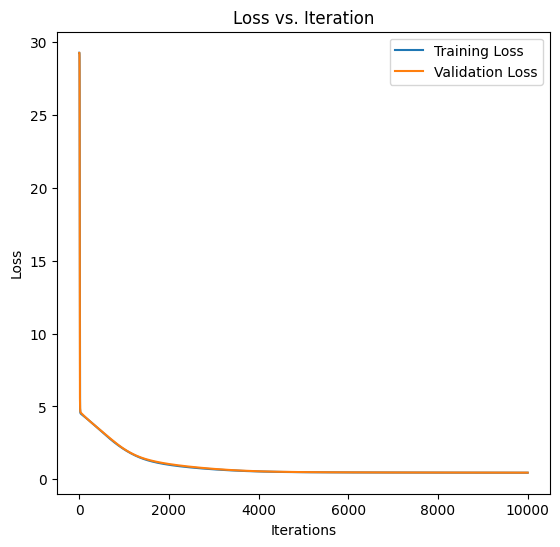

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cost_train_list, label='Training Loss')
plt.plot(cost_val_list, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.legend()



In [ ]:
print(acc_train_list)

[15.24, 15.24, 15.24, 15.31, 15.34, 15.31, 15.78, 17.13, 20.06, 26.4, 36.95, 47.27, 55.8, 60.89, 64.13, 66.15, 67.84, 69.49, 70.26, 71.11, 71.88, 72.45, 72.86, 72.93, 72.96, 73.06, 73.2, 73.2, 73.23, 73.33, 73.33, 73.36, 73.36, 73.4, 73.43, 73.47, 73.5, 73.5, 73.53, 73.53, 73.5, 73.47, 73.47, 73.5, 73.5, 73.47, 73.47, 73.47, 73.47, 73.47, 73.47, 73.47, 73.47, 73.47, 73.47, 73.47, 73.4, 73.4, 73.4, 73.4, 73.36, 73.36, 73.36, 73.36, 73.36, 73.36, 73.36, 73.36, 73.36, 73.36, 73.36, 73.36, 73.36, 73.33, 73.3, 73.26, 73.3, 73.33, 73.33, 73.33, 73.33, 73.33, 73.36, 73.3, 73.3, 73.3, 73.3, 73.3, 73.3, 73.33, 73.36, 73.36, 73.36, 73.36, 73.33, 73.33, 73.33, 73.36, 73.36, 73.36, 73.4, 73.4, 73.4, 73.4, 73.43, 73.43, 73.43, 73.43, 73.43, 73.43, 73.43, 73.47, 73.47, 73.5, 73.47, 73.47, 73.43, 73.47, 73.47, 73.47, 73.47, 73.47, 73.47, 73.5, 73.5, 73.57, 73.57, 73.6, 73.57, 73.53, 73.53, 73.57, 73.57, 73.6, 73.6, 73.57, 73.57, 73.57, 73.53, 73.53, 73.5, 73.53, 73.53, 73.57, 73.57, 73.53, 73.53, 73.

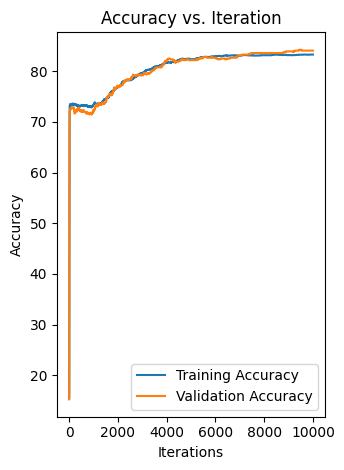

In [ ]:

plt.subplot(1, 2, 2)
plt.plot(acc_train_list, label='Training Accuracy')
plt.plot(acc_val_list, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

**Part B**

In [ ]:
def min_max_scale(X):
    min_values = X.min(axis=0)
    max_values = X.max(axis=0)
    return (X - min_values) / (max_values - min_values)

In [ ]:
iterations = 10000
learning_rate = 1.5/iterations
W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list = model(X_train, Y_train, X_val, Y_val, learning_rate, iterations)

Iteration 0: Training cost = 15.694946676269662, Validation cost = 12.097302380686129
Iteration 1000: Training cost = 2.7428110202195306, Validation cost = 3.0433983598074907
Iteration 2000: Training cost = 1.9739647702162542, Validation cost = 2.12131033254299
Iteration 3000: Training cost = 1.2880296538379854, Validation cost = 1.31885565252138
Iteration 4000: Training cost = 0.7587598912947349, Validation cost = 0.785358760403626
Iteration 5000: Training cost = 0.5757962028909022, Validation cost = 0.5948881855871204
Iteration 6000: Training cost = 0.5321967657333792, Validation cost = 0.5481767411946064
Iteration 7000: Training cost = 0.5126468536931932, Validation cost = 0.5273298197535881
Iteration 8000: Training cost = 0.5006946193384826, Validation cost = 0.5141695314739072
Iteration 9000: Training cost = 0.49248188455886766, Validation cost = 0.5047972685867612


In [ ]:
W, B, cost_train_no_scaling, cost_val_no_scaling, acc_train_no_scaling, acc_val_no_scaling = model(
    X_train, Y_train, X_val, Y_val, learning_rate, iterations
)

Iteration 0: Training cost = 5.003023953524757, Validation cost = 4.775755751697234
Iteration 1000: Training cost = 3.9577336118342172, Validation cost = 3.9656719864234327
Iteration 2000: Training cost = 2.687840769719014, Validation cost = 2.8232078091818296
Iteration 3000: Training cost = 1.6590271372976586, Validation cost = 1.7648270547489449
Iteration 4000: Training cost = 0.9431157836956849, Validation cost = 0.9845456477006641
Iteration 5000: Training cost = 0.534261234872137, Validation cost = 0.5345439397406705
Iteration 6000: Training cost = 0.43326146252851544, Validation cost = 0.4219497671604321
Iteration 7000: Training cost = 0.41686043666145917, Validation cost = 0.40386425254394803
Iteration 8000: Training cost = 0.41192465315655286, Validation cost = 0.3991146005272402
Iteration 9000: Training cost = 0.4093274401869964, Validation cost = 0.3970368144057157


In [ ]:
x_train_scaled = min_max_scale(x_train)
x_val_scaled = min_max_scale(x_val)
x_test_scaled = min_max_scale(x_test)

X_train_scaled = x_train_scaled.T
Y_train_scaled = y_train.reshape(1, X_train_scaled.shape[1])

X_val_scaled = x_val_scaled.T
Y_val_scaled = y_val.reshape(1, X_val_scaled.shape[1])

X_test_scaled = x_test_scaled.T
Y_test_scaled = y_test.reshape(1, X_test_scaled.shape[1])

In [ ]:
W, B, cost_train_scaled, cost_val_scaled, acc_train_scaled, acc_val_scaled = model(
    X_train_scaled, Y_train_scaled, X_val_scaled, Y_val_scaled, learning_rate, iterations
)

Iteration 0: Training cost = 0.7865343034370513, Validation cost = 0.7875914407318408
Iteration 1000: Training cost = 0.7397535158957301, Validation cost = 0.7392137973162078
Iteration 2000: Training cost = 0.7000497767696028, Validation cost = 0.69817518974532
Iteration 3000: Training cost = 0.6663468574667185, Validation cost = 0.6633599712552091
Iteration 4000: Training cost = 0.6377069421029167, Validation cost = 0.6337953548752225
Iteration 5000: Training cost = 0.6133263215732363, Validation cost = 0.6086472551145811
Iteration 6000: Training cost = 0.5925242162482934, Validation cost = 0.587208914652808
Iteration 7000: Training cost = 0.5747285097274659, Validation cost = 0.568886251484973
Iteration 8000: Training cost = 0.5594608107486579, Validation cost = 0.5531824505553269
Iteration 9000: Training cost = 0.5463222310346443, Validation cost = 0.5396832561895819


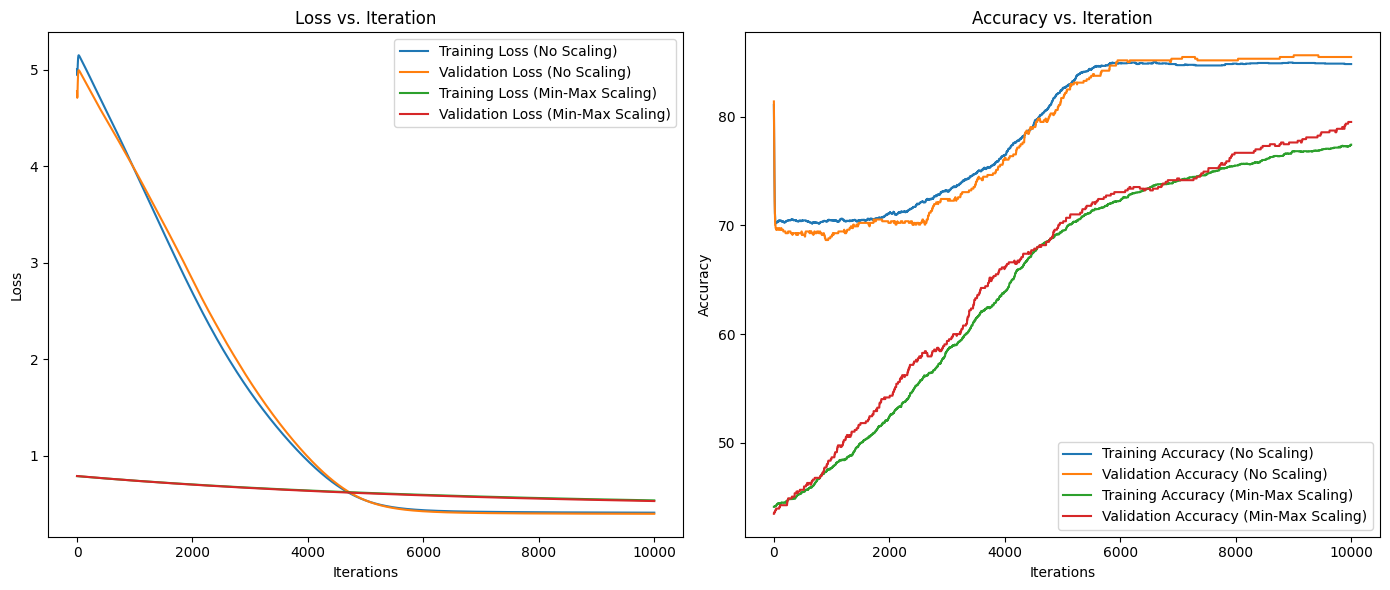

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cost_train_no_scaling, label='Training Loss (No Scaling)')
plt.plot(cost_val_no_scaling, label='Validation Loss (No Scaling)')
plt.plot(cost_train_scaled, label='Training Loss (Min-Max Scaling)')
plt.plot(cost_val_scaled, label='Validation Loss (Min-Max Scaling)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_train_no_scaling, label='Training Accuracy (No Scaling)')
plt.plot(acc_val_no_scaling, label='Validation Accuracy (No Scaling)')
plt.plot(acc_train_scaled, label='Training Accuracy (Min-Max Scaling)')
plt.plot(acc_val_scaled, label='Validation Accuracy (Min-Max Scaling)')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(acc_train_scaled)

[44.1, 44.1, 44.1, 44.1, 44.1, 44.1, 44.1, 44.1, 44.1, 44.1, 44.13, 44.13, 44.13, 44.13, 44.13, 44.13, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.17, 44.2, 44.2, 44.2, 44.2, 44.2, 44.2, 44.23, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.27, 44.34, 44.34, 44.34, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.37, 44.4, 44.4, 44.4, 44.44, 44.44, 44.44, 44.44, 44.44, 44.44, 44.44, 44.44, 44.4, 44.4, 44.4, 44.4, 44.4, 44.44, 44.44, 44.44, 44.44, 44.44, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.4, 44.37, 44.37, 44.37, 44.37, 44.37, 44.4, 44.4, 44.4, 44.4, 44.44, 44.44, 44.47, 44.47, 44.44, 44.44, 44.44, 44.44, 44.47, 44.47, 44.47, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.5, 44.

In [ ]:
def predict(X, W):
    Z = np.dot(W.T, X)
    A = sigmoid(Z)
    return (A > 0.5).astype(int)

In [ ]:
W, B, cost_train_no_scaling, cost_val_no_scaling, acc_train_no_scaling, acc_val_no_scaling = model(
    X_train, Y_train, X_val, Y_val, learning_rate, iterations
)

Iteration 0: Training cost = 29.066112627980296, Validation cost = 28.710469786672167
Iteration 1000: Training cost = 4.287257189518825, Validation cost = 3.741009024918538
Iteration 2000: Training cost = 1.7176197981523689, Validation cost = 1.4919500330812066
Iteration 3000: Training cost = 1.0566708938895997, Validation cost = 0.9618168231509874
Iteration 4000: Training cost = 0.7285173676987476, Validation cost = 0.6672082588124115
Iteration 5000: Training cost = 0.5414440250104932, Validation cost = 0.5003261110145965
Iteration 6000: Training cost = 0.47261515277763183, Validation cost = 0.4430752523694997
Iteration 7000: Training cost = 0.45373425803377293, Validation cost = 0.4287490498481244
Iteration 8000: Training cost = 0.44711426791576026, Validation cost = 0.4234589547598711
Iteration 9000: Training cost = 0.4438707340601875, Validation cost = 0.4204647510961661


**Part C**

Confusion Matrix:
[[531   7]
 [ 92   5]]
Precision: 0.42
Recall: 0.05
F1 Score: 0.09
ROC-AUC Score: 0.65


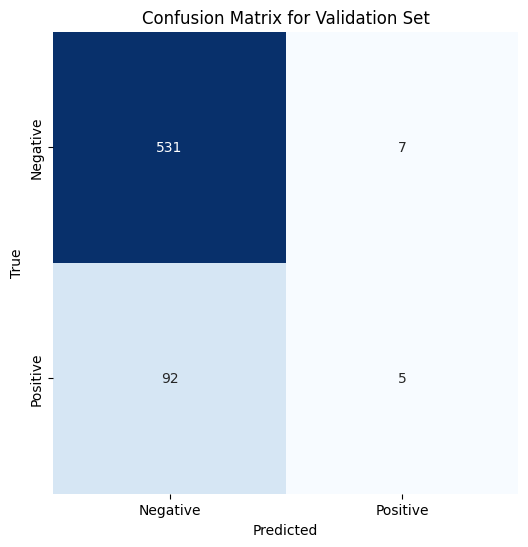

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns


Y_val_pred = predict(X_val, W)

Y_val_true = Y_val.flatten()
Y_val_pred_flat = Y_val_pred.flatten()
conf_matrix = confusion_matrix(Y_val_true, Y_val_pred_flat)
precision = precision_score(Y_val_true, Y_val_pred_flat)
recall = recall_score(Y_val_true, Y_val_pred_flat)
f1 = f1_score(Y_val_true, Y_val_pred_flat)

Y_val_scores = sigmoid(np.dot(W.T, X_val) + B).flatten()
roc_auc = roc_auc_score(Y_val_true, Y_val_scores)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Validation Set')
plt.show()


**Part-D**

In [ ]:
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

In [ ]:
def compute_cost(Y_true, Y_pred):
    epsilon = 1e-15
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
    return -np.mean(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred))

In [ ]:
def accuracy(X, Y, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype='int64')
    acc = (1 - np.sum(np.absolute(A - Y)) / Y.shape[1]) * 100
    return round(acc, 2)

In [ ]:
import numpy as np

def sgd_model(X_train, Y_train, X_val, Y_val, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.random.randn(n, 1) * 0.01
    B = 0

    cost_train_list = []
    cost_val_list = []
    acc_train_list = []
    acc_val_list = []

    for i in range(iterations):
        for j in range(m):
            X_sample = X_train[:, j:j+1]
            Y_sample = Y_train[:, j:j+1]

            Z_train = np.dot(W.T, X_sample) + B
            A_train = sigmoid(Z_train)

            dW = (A_train - Y_sample) @ X_sample.T
            dB = np.sum(A_train - Y_sample)

            W -= learning_rate * dW.T
            B -= learning_rate * dB

        Z_train = np.dot(W.T, X_train) + B
        A_train = sigmoid(Z_train)
        epsilon = 1e-15
        A_train = np.clip(A_train, epsilon, 1 - epsilon)
        cost_train = -(1 / m) * np.sum(Y_train * np.log(A_train) + (1 - Y_train) * np.log(1 - A_train))
        cost_train_list.append(cost_train)
        acc_train_list.append(accuracy(X_train, Y_train, W, B))

        Z_val = np.dot(W.T, X_val) + B
        A_val = sigmoid(Z_val)
        A_val = np.clip(A_val, epsilon, 1 - epsilon)
        cost_val = -(1 / X_val.shape[1]) * np.sum(Y_val * np.log(A_val) + (1 - Y_val) * np.log(1 - A_val))
        cost_val_list.append(cost_val)
        acc_val_list.append(accuracy(X_val, Y_val, W, B))

        if i % (iterations // 10) == 0:
            print(f"SGD Iteration {i}: Training cost = {cost_train}, Validation cost = {cost_val}")

    return W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list


In [ ]:
def mini_batch_model(X_train, Y_train, X_val, Y_val, learning_rate, iterations, batch_size):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.random.randn(n, 1) * 0.01
    B = 0

    cost_train_list = []
    cost_val_list = []
    acc_train_list = []
    acc_val_list = []

    for i in range(iterations):
        permutation = np.random.permutation(m)
        X_train_shuffled = X_train[:, permutation]
        Y_train_shuffled = Y_train[:, permutation]

        for j in range(0, m, batch_size):
            end = min(j + batch_size, m)
            X_batch = X_train_shuffled[:, j:end]
            Y_batch = Y_train_shuffled[:, j:end]

            Z_batch = np.dot(W.T, X_batch) + B
            A_batch = sigmoid(Z_batch)

            dW = (1 / batch_size) * np.dot(A_batch - Y_batch, X_batch.T)
            dB = (1 / batch_size) * np.sum(A_batch - Y_batch)

            W -= learning_rate * dW.T
            B -= learning_rate * dB

        Z_train = np.dot(W.T, X_train) + B
        A_train = sigmoid(Z_train)
        epsilon = 1e-15
        A_train = np.clip(A_train, epsilon, 1 - epsilon)
        cost_train = -(1 / m) * np.sum(Y_train * np.log(A_train) + (1 - Y_train) * np.log(1 - A_train))
        cost_train_list.append(cost_train)
        acc_train_list.append(accuracy(X_train, Y_train, W, B))

        Z_val = np.dot(W.T, X_val) + B
        A_val = sigmoid(Z_val)
        A_val = np.clip(A_val, epsilon, 1 - epsilon)
        cost_val = -(1 / X_val.shape[1]) * np.sum(Y_val * np.log(A_val) + (1 - Y_val) * np.log(1 - A_val))
        cost_val_list.append(cost_val)
        acc_val_list.append(accuracy(X_val, Y_val, W, B))

        if i % (iterations // 10) == 0:
            print(f"Mini-Batch Iteration {i}: Training cost = {cost_train}, Validation cost = {cost_val}")

    return W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list


In [ ]:
iterations = 100
learning_rate = 0.00000001
batch_sizes = [32, 64]

W_sgd, B_sgd, cost_train_sgd, cost_val_sgd, acc_train_sgd, acc_val_sgd = sgd_model(X_train, Y_train, X_val, Y_val, learning_rate, iterations)

SGD Iteration 0: Training cost = 0.4405268608986851, Validation cost = 0.43386208899470463
SGD Iteration 10: Training cost = 0.44014948198750725, Validation cost = 0.4332103829187196
SGD Iteration 20: Training cost = 0.4399223651166444, Validation cost = 0.43292541477591256
SGD Iteration 30: Training cost = 0.4396990610752021, Validation cost = 0.4326504325870837
SGD Iteration 40: Training cost = 0.4394787833777895, Validation cost = 0.4323800938525789
SGD Iteration 50: Training cost = 0.43926145621126383, Validation cost = 0.4321141761930908
SGD Iteration 60: Training cost = 0.4390470201319926, Validation cost = 0.43185257095406104
SGD Iteration 70: Training cost = 0.4388354179813695, Validation cost = 0.4315951753692256
SGD Iteration 80: Training cost = 0.4386265944849712, Validation cost = 0.431341890074306
SGD Iteration 90: Training cost = 0.43842049615433704, Validation cost = 0.4310926189170604


In [ ]:



results_mb32 = mini_batch_model(X_train, Y_train, X_val, Y_val, learning_rate, iterations, batch_size=32)
results_mb64 = mini_batch_model(X_train, Y_train, X_val, Y_val, learning_rate, iterations, batch_size=64)

cost_train_mb32, cost_val_mb32, acc_train_mb32, acc_val_mb32 = results_mb32[2], results_mb32[3], results_mb32[4], results_mb32[5]
cost_train_mb64, cost_val_mb64, acc_train_mb64, acc_val_mb64 = results_mb64[2], results_mb64[3], results_mb64[4], results_mb64[5]






Mini-Batch Iteration 0: Training cost = 0.5379543051103964, Validation cost = 0.5167012330053635
Mini-Batch Iteration 10: Training cost = 0.5174143106394623, Validation cost = 0.4960072654895947
Mini-Batch Iteration 20: Training cost = 0.5029372194861036, Validation cost = 0.4813793766187244
Mini-Batch Iteration 30: Training cost = 0.4925655719901783, Validation cost = 0.47086469413493315
Mini-Batch Iteration 40: Training cost = 0.48503051318825036, Validation cost = 0.46319692682218927
Mini-Batch Iteration 50: Training cost = 0.4794872363500261, Validation cost = 0.4575323898679703
Mini-Batch Iteration 60: Training cost = 0.4753645532283857, Validation cost = 0.4533001575387362
Mini-Batch Iteration 70: Training cost = 0.47226765182394315, Validation cost = 0.4501051077677349
Mini-Batch Iteration 80: Training cost = 0.4699224012696054, Validation cost = 0.4476726006077501
Mini-Batch Iteration 90: Training cost = 0.4681303476061954, Validation cost = 0.44580333260997973
Mini-Batch Itera

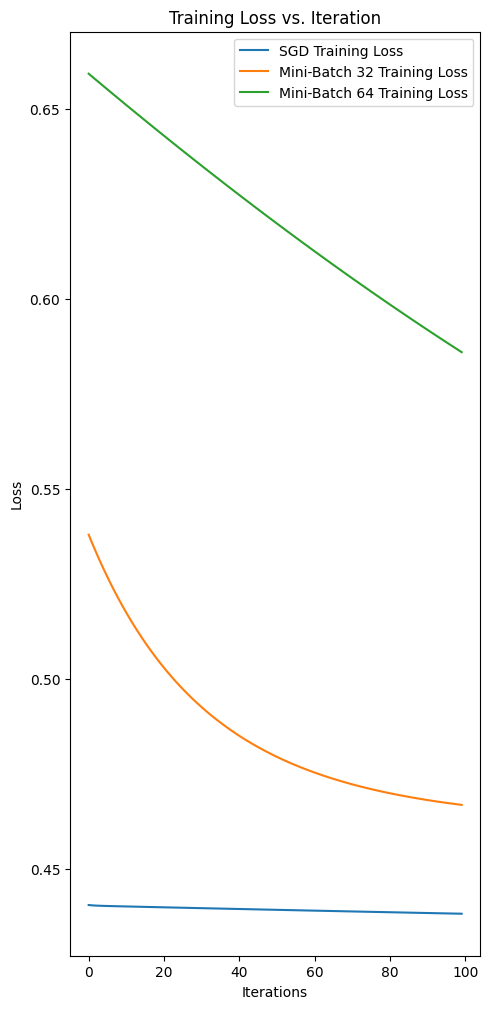

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))

plt.subplot(1, 3, 1)
plt.plot(cost_train_sgd, label='SGD Training Loss')
plt.plot(cost_train_mb32, label='Mini-Batch 32 Training Loss')
plt.plot(cost_train_mb64, label='Mini-Batch 64 Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.legend()





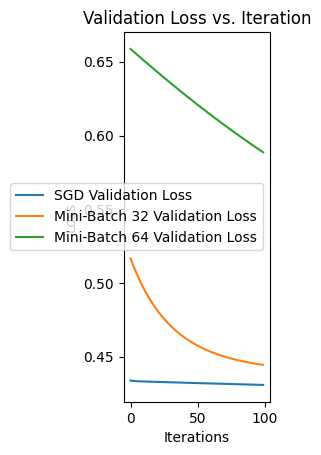

In [ ]:
plt.subplot(1, 3, 2)
plt.plot(cost_val_sgd, label='SGD Validation Loss')
plt.plot(cost_val_mb32, label='Mini-Batch 32 Validation Loss')
plt.plot(cost_val_mb64, label='Mini-Batch 64 Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iteration')
plt.legend()


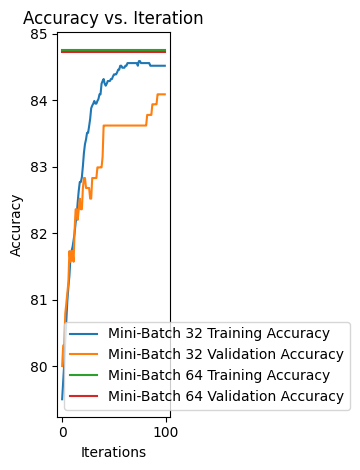

In [ ]:
plt.subplot(1, 3, 3)

plt.plot(acc_train_mb32, label='Mini-Batch 32 Training Accuracy')
plt.plot(acc_val_mb32, label='Mini-Batch 32 Validation Accuracy')
plt.plot(acc_train_mb64, label='Mini-Batch 64 Training Accuracy')
plt.plot(acc_val_mb64, label='Mini-Batch 64 Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

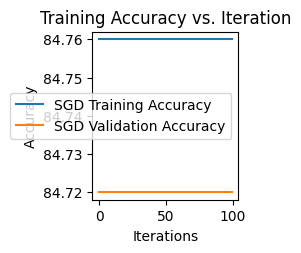

In [ ]:
plt.subplot(2, 3, 4)
plt.plot(acc_train_sgd, label='SGD Training Accuracy')
plt.plot(acc_val_sgd, label='SGD Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Iteration')
plt.legend()



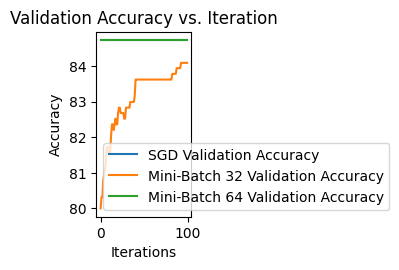

In [ ]:
plt.subplot(2, 3, 5)
plt.plot(acc_val_sgd, label='SGD Validation Accuracy')
plt.plot(acc_val_mb32, label='Mini-Batch 32 Validation Accuracy')
plt.plot(acc_val_mb64, label='Mini-Batch 64 Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Iteration')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def compute_metrics(Y_true, Y_pred):
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1 = f1_score(Y_true, Y_pred)
    accuracy = accuracy_score(Y_true, Y_pred)
    return accuracy, precision, recall, f1

**Part- E**

In [ ]:
def manual_k_fold_cv(X, y, k=5, learning_rate=0.01, iterations=1000):
    fold_size = len(X) // k
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for i in range(k):
        val_start = i * fold_size
        val_end = (i + 1) * fold_size if i < k - 1 else len(X)

        X_val = X[val_start:val_end]
        y_val = y[val_start:val_end]

        X_train = np.concatenate((X[:val_start], X[val_end:]), axis=0)
        y_train = np.concatenate((y[:val_start], y[val_end:]), axis=0)

        X_train = X_train.T
        Y_train = y_train.reshape(1, X_train.shape[1])
        X_val = X_val.T
        Y_val = y_val.reshape(1, X_val.shape[1])

        W, B, _, _, _, _ = model(X_train, Y_train, X_val, Y_val, learning_rate, iterations)

        y_val_pred = predict(X_val, W)

        accuracy, precision, recall, f1 = compute_metrics(Y_val.flatten(), y_val_pred.flatten())

        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"Fold {i + 1} - Accuracy: {accuracy:.2f}")

    accuracy_avg = np.mean(accuracy_list)
    accuracy_std = np.std(accuracy_list)
    precision_avg = np.mean(precision_list)
    precision_std = np.std(precision_list)
    recall_avg = np.mean(recall_list)
    recall_std = np.std(recall_list)
    f1_avg = np.mean(f1_list)
    f1_std = np.std(f1_list)

    return {
        "accuracy": (accuracy_avg, accuracy_std),
        "precision": (precision_avg, precision_std),
        "recall": (recall_avg, recall_std),
        "f1_score": (f1_avg, f1_std)
    }


In [ ]:

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


results = manual_k_fold_cv(X, y, k=5, learning_rate=0.00001, iterations=10000)

print(f"Average Accuracy: {results['accuracy'][0]:.2f} ± {results['accuracy'][1]:.2f}")
print(f"Average Precision: {results['precision'][0]:.2f} ± {results['precision'][1]:.2f}")
print(f"Average Recall: {results['recall'][0]:.2f} ± {results['recall'][1]:.2f}")
print(f"Average F1 Score: {results['f1_score'][0]:.2f} ± {results['f1_score'][1]:.2f}")

Iteration 0: Training cost = 5.306213881140786, Validation cost = 5.015666465848894
Iteration 1000: Training cost = 2.2311818278785185, Validation cost = 2.0399887135572654
Iteration 2000: Training cost = 2.10517980659268, Validation cost = 1.9255069602646007
Iteration 3000: Training cost = 1.9952027821948384, Validation cost = 1.8284625983797314
Iteration 4000: Training cost = 1.898036256717899, Validation cost = 1.7445371716712392
Iteration 5000: Training cost = 1.812506009957414, Validation cost = 1.6731062485378498
Iteration 6000: Training cost = 1.7384715256713845, Validation cost = 1.610212118815414
Iteration 7000: Training cost = 1.6737964891957173, Validation cost = 1.5553304031400512
Iteration 8000: Training cost = 1.617524425722348, Validation cost = 1.5051572392420909
Iteration 9000: Training cost = 1.5684243764377104, Validation cost = 1.4614655675407011
Fold 1 - Accuracy: 0.79
Iteration 0: Training cost = 5.201522917424973, Validation cost = 5.227888635236475
Iteration 100

In [ ]:

def model(X_train, Y_train, X_val, Y_val, learning_rate, iterations, early_stopping_rounds, regularization=None, lambda_=0):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.random.uniform(-1, 1, size=(n, 1))
    B = 0

    cost_train_list = []
    cost_val_list = []
    acc_train_list = []
    acc_val_list = []

    best_cost_val = float('inf')
    epochs_without_improvement = 0

    for i in range(iterations):
        Z_train = np.dot(W.T, X_train) + B
        A_train = sigmoid(Z_train)
        epsilon = 1e-15
        A_train = np.clip(A_train, epsilon, 1 - epsilon)
        cost_train = -(1 / m) * np.sum(Y_train * np.log(A_train) + (1 - Y_train) * np.log(1 - A_train))

        if regularization == 'l1':
            cost_train += lambda_ * np.sum(np.abs(W))
            dW = (1 / m) * (np.dot(A_train - Y_train, X_train.T) + lambda_ * np.sign(W).T)
        elif regularization == 'l2':
            cost_train += (lambda_ / 2) * np.sum(np.square(W))
            dW = (1 / m) * (np.dot(A_train - Y_train, X_train.T) + lambda_ * W.T)
        else:
            dW = (1 / m) * np.dot(A_train - Y_train, X_train.T)

        dB = (1 / m) * np.sum(A_train - Y_train)

        W -= learning_rate * dW.T
        B -= learning_rate * dB

        cost_train_list.append(cost_train)
        acc_train_list.append(accuracy(X_train, Y_train, W, B))

        Z_val = np.dot(W.T, X_val) + B
        A_val = sigmoid(Z_val)
        A_val = np.clip(A_val, epsilon, 1 - epsilon)
        cost_val = -(1 / X_val.shape[1]) * np.sum(Y_val * np.log(A_val) + (1 - Y_val) * np.log(1 - A_val))
        cost_val_list.append(cost_val)
        acc_val_list.append(accuracy(X_val, Y_val, W, B))

        if cost_val < best_cost_val:
            best_cost_val = cost_val
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if early_stopping_rounds is not None and epochs_without_improvement >= early_stopping_rounds:
            print(f"Early stopping at iteration {i}")
            break

        if i % (iterations // 10) == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Validation cost = {cost_val}")

    return W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list



In [ ]:
iterations = 10000
learning_rate = 1.5 / iterations
lambda_ = 0.1
early_stopping_rounds = 5000
configs = [
    {'regularization': None, 'lambda_': lambda_, 'early_stopping': None},
    {'regularization': 'l1', 'lambda_': lambda_, 'early_stopping': early_stopping_rounds},
    {'regularization': 'l2', 'lambda_': lambda_, 'early_stopping': early_stopping_rounds}
]

results = {}

for config in configs:
    reg = config['regularization']
    lamb = config['lambda_']
    early_stop = config['early_stopping']

    print(f"Training with learning_rate={learning_rate}, regularization={reg}, lambda_={lamb}, early_stopping={early_stop}")

    W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list = model(
        X_train, Y_train, X_val, Y_val, learning_rate, iterations,
        early_stopping_rounds=early_stop, regularization=reg, lambda_=lamb
    )

    results[reg] = {
        'cost_train': cost_train_list,
        'cost_val': cost_val_list,
        'acc_train': acc_train_list,
        'acc_val': acc_val_list
    }

Training with learning_rate=0.00015, regularization=None, lambda_=0.1, early_stopping=None
Iteration 0: Training cost = 5.263495256405808, Validation cost = 5.276002063474546
Iteration 1000: Training cost = 2.2529537964326747, Validation cost = 2.1508266607833204
Iteration 2000: Training cost = 1.0766846882591874, Validation cost = 1.000116554118686
Iteration 3000: Training cost = 0.7659731266144388, Validation cost = 0.7271523284922687
Iteration 4000: Training cost = 0.6494146420086321, Validation cost = 0.6245818736467285
Iteration 5000: Training cost = 0.5756964906321054, Validation cost = 0.5523078592050156
Iteration 6000: Training cost = 0.5241947846231622, Validation cost = 0.5002317489298576
Iteration 7000: Training cost = 0.489929941949128, Validation cost = 0.4647757229565784
Iteration 8000: Training cost = 0.4685777791835082, Validation cost = 0.44227205156977994
Iteration 9000: Training cost = 0.45589456196510264, Validation cost = 0.4287048915730673
Training with learning_r

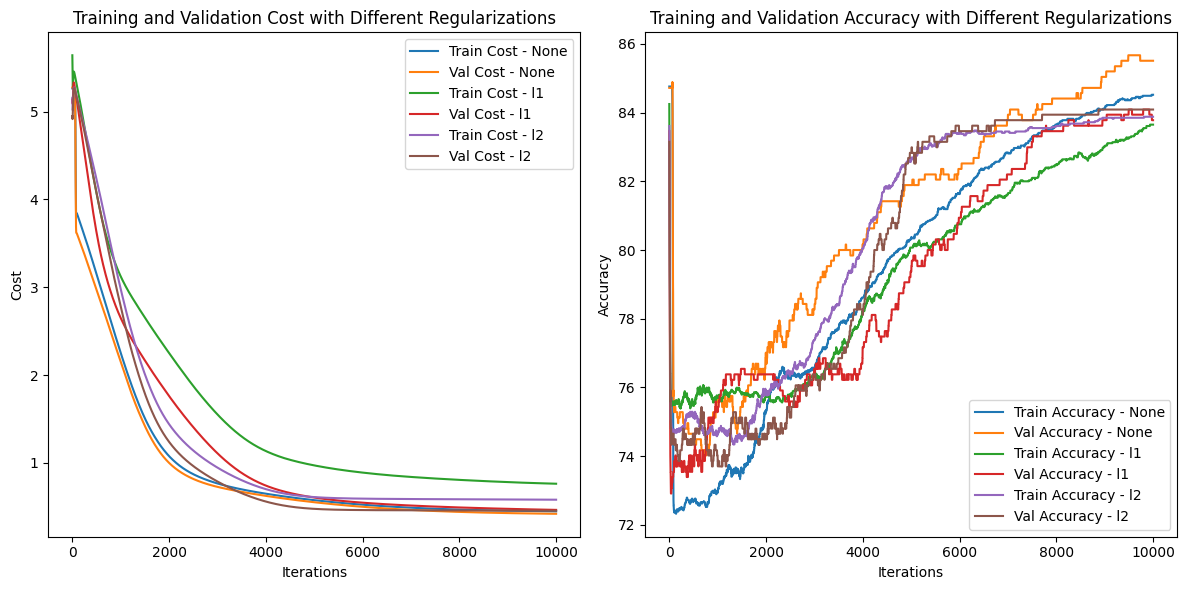

In [ ]:
def plot_results(results):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    for reg, result in results.items():
        plt.plot(result['cost_train'], label=f'Train Cost - {reg}')
        plt.plot(result['cost_val'], label=f'Val Cost - {reg}')

    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Training and Validation Cost with Different Regularizations')
    plt.legend()

    plt.subplot(1, 2, 2)
    for reg, result in results.items():
        plt.plot(result['acc_train'], label=f'Train Accuracy - {reg}')
        plt.plot(result['acc_val'], label=f'Val Accuracy - {reg}')

    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy with Different Regularizations')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(results)


In [ ]:
iterations = 10000
learning_rate = 2 / iterations
lambda_ = 0.1
early_stopping_rounds = 5000

configs = [
    {'regularization': None, 'lambda_': lambda_, 'early_stopping': early_stopping_rounds},
    {'regularization': 'l1', 'lambda_': lambda_, 'early_stopping': early_stopping_rounds},
    {'regularization': 'l2', 'lambda_': lambda_, 'early_stopping': early_stopping_rounds}
]

results = {}

for config in configs:
    reg = config['regularization']
    lamb = config['lambda_']
    early_stop = config['early_stopping']

    print(f"Training with learning_rate={learning_rate}, regularization={reg}, lambda_={lamb}, early_stopping={early_stop}")

    W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list = model(
        X_train, Y_train, X_val, Y_val, learning_rate, iterations,
        early_stopping_rounds=early_stop, regularization=reg, lambda_=lamb
    )

    results[reg] = {
        'cost_train': cost_train_list,
        'cost_val': cost_val_list,
        'acc_train': acc_train_list,
        'acc_val': acc_val_list
    }

Training with learning_rate=0.0002, regularization=None, lambda_=0.1, early_stopping=5000
Iteration 0: Training cost = 29.249551216440665, Validation cost = 29.057207951890422
Iteration 1000: Training cost = 1.1566791438086372, Validation cost = 1.0840031055290666
Iteration 2000: Training cost = 0.605303488313658, Validation cost = 0.6018358292422076
Iteration 3000: Training cost = 0.5341202784065006, Validation cost = 0.5323132387734115
Iteration 4000: Training cost = 0.5182643471563515, Validation cost = 0.5188241927143201
Iteration 5000: Training cost = 0.5227010813900596, Validation cost = 0.5153030241728219
Iteration 6000: Training cost = 0.5228084599855517, Validation cost = 0.5098901024768606
Iteration 7000: Training cost = 0.5233787415664537, Validation cost = 0.5056306846694305
Iteration 8000: Training cost = 0.5239807523450457, Validation cost = 0.5022511113196316
Iteration 9000: Training cost = 0.5245113537669223, Validation cost = 0.49950436042897134
Training with learning_

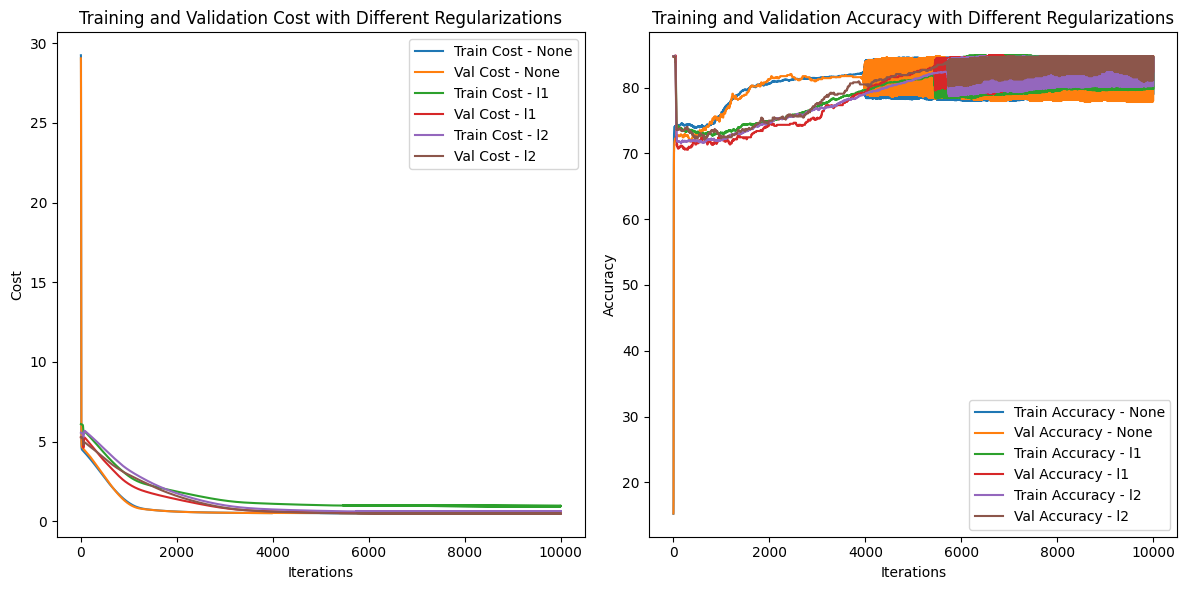

In [ ]:
plot_results(results)


In [ ]:
iterations = 10000
learning_rate = 0.5 / iterations
lambda_ = 0.1
early_stopping_rounds = 5000

configs = [
    {'regularization': None, 'lambda_': lambda_, 'early_stopping': early_stopping_rounds},
    {'regularization': 'l1', 'lambda_': lambda_, 'early_stopping': None},
    {'regularization': 'l2', 'lambda_': lambda_, 'early_stopping': None}
]

results = {}

for config in configs:
    reg = config['regularization']
    lamb = config['lambda_']
    early_stop = config['early_stopping']

    print(f"Training with learning_rate={learning_rate}, regularization={reg}, lambda_={lamb}, early_stopping={early_stop}")

    W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list = model(
        X_train, Y_train, X_val, Y_val, learning_rate, iterations,
        early_stopping_rounds=early_stop, regularization=reg, lambda_=lamb
    )

    results[reg] = {
        'cost_train': cost_train_list,
        'cost_val': cost_val_list,
        'acc_train': acc_train_list,
        'acc_val': acc_val_list
    }

Training with learning_rate=5e-05, regularization=None, lambda_=0.1, early_stopping=5000
Iteration 0: Training cost = 29.248310652278935, Validation cost = 29.26345178563684
Iteration 1000: Training cost = 3.4475252079361693, Validation cost = 3.4278065991162205
Iteration 2000: Training cost = 2.6822356606249667, Validation cost = 2.692736387640055
Iteration 3000: Training cost = 2.0878221644616053, Validation cost = 2.1259075918110866
Iteration 4000: Training cost = 1.6791881540839355, Validation cost = 1.6973522032742607
Iteration 5000: Training cost = 1.3784890568063977, Validation cost = 1.3688824054430768
Iteration 6000: Training cost = 1.1567384302996055, Validation cost = 1.1031130105341527
Iteration 7000: Training cost = 0.9755923547861687, Validation cost = 0.9038358057579634
Iteration 8000: Training cost = 0.8266974947440356, Validation cost = 0.7682641568848326
Iteration 9000: Training cost = 0.7180031934465974, Validation cost = 0.6723431882509424
Training with learning_rat

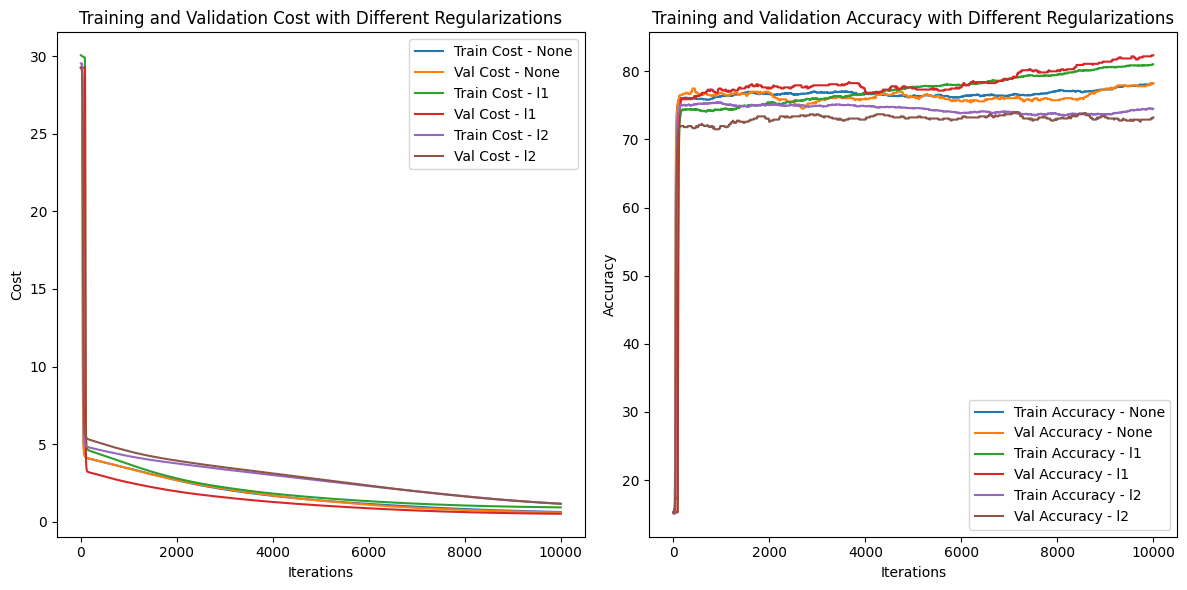

In [ ]:
plot_results(results)


In [ ]:

def model(X_train, Y_train, X_val, Y_val, learning_rate, iterations, early_stopping_rounds, regularization=None, lambda_=0):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.random.uniform(-1, 1, size=(n, 1))
    B = 0

    cost_train_list = []
    cost_val_list = []
    acc_train_list = []
    acc_val_list = []

    best_cost_val = float('inf')
    epochs_without_improvement = 0

    for i in range(iterations):
        Z_train = np.dot(W.T, X_train) + B
        A_train = sigmoid(Z_train)
        epsilon = 1e-15
        A_train = np.clip(A_train, epsilon, 1 - epsilon)
        cost_train = -(1 / m) * np.sum(Y_train * np.log(A_train) + (1 - Y_train) * np.log(1 - A_train))

        if regularization == 'l1':
            cost_train += lambda_ * np.sum(np.abs(W))
            dW = (1 / m) * (np.dot(A_train - Y_train, X_train.T) + lambda_ * np.sign(W).T)
        elif regularization == 'l2':
            cost_train += (lambda_ / 2) * np.sum(np.square(W))
            dW = (1 / m) * (np.dot(A_train - Y_train, X_train.T) + lambda_ * W.T)
        else:
            dW = (1 / m) * np.dot(A_train - Y_train, X_train.T)

        dB = (1 / m) * np.sum(A_train - Y_train)

        W -= learning_rate * dW.T
        B -= learning_rate * dB

        cost_train_list.append(cost_train)
        acc_train_list.append(accuracy(X_train, Y_train, W, B))

        Z_val = np.dot(W.T, X_val) + B
        A_val = sigmoid(Z_val)
        A_val = np.clip(A_val, epsilon, 1 - epsilon)
        cost_val = -(1 / X_val.shape[1]) * np.sum(Y_val * np.log(A_val) + (1 - Y_val) * np.log(1 - A_val))
        cost_val_list.append(cost_val)
        acc_val_list.append(accuracy(X_val, Y_val, W, B))

        if cost_val < best_cost_val:
            best_cost_val = cost_val
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if early_stopping_rounds is not None and epochs_without_improvement >= early_stopping_rounds:
            print(f"Early stopping at iteration {i}")
            break

        if i % (iterations // 10) == 0:
            print(f"Iteration {i}: Training cost = {cost_train}, Test cost = {cost_val}")

    return W, B, cost_train_list, cost_val_list, acc_train_list, acc_val_list



In [ ]:
iterations = 10000
learning_rate = 2 / iterations
lambda_ = 0.1
early_stopping_rounds = 5000

configs = [
    {'regularization': None, 'lambda_': lambda_, 'early_stopping': early_stopping_rounds},
    {'regularization': 'l1', 'lambda_': lambda_, 'early_stopping': early_stopping_rounds},
    {'regularization': 'l2', 'lambda_': lambda_, 'early_stopping': early_stopping_rounds}
]

results = {}

for config in configs:
    reg = config['regularization']
    lamb = config['lambda_']
    early_stop = config['early_stopping']

    print(f"Training with learning_rate={learning_rate}, regularization={reg}, lambda_={lamb}, early_stopping={early_stop}")

    W, B, cost_train_list, cost_test_list, acc_train_list, acc_test_list = model(
        X_train, Y_train, X_test, Y_test, learning_rate, iterations,
        early_stopping_rounds=early_stop, regularization=reg, lambda_=lamb
    )

    results[reg] = {
        'cost_train': cost_train_list,
        'cost_test': cost_test_list,
        'acc_train': acc_train_list,
        'acc_test': acc_test_list
    }

Training with learning_rate=0.0002, regularization=None, lambda_=0.1, early_stopping=5000
Iteration 0: Training cost = 5.263495256405808, Test cost = 5.15099490975905
Iteration 1000: Training cost = 1.5160361598338594, Test cost = 1.511685636244546
Iteration 2000: Training cost = 0.7428442948418147, Test cost = 0.7465279700321372
Iteration 3000: Training cost = 0.5169086158431107, Test cost = 0.5044142448558167
Iteration 4000: Training cost = 0.5085679951157686, Test cost = 0.4691229776288051
Iteration 5000: Training cost = 0.5062909537548368, Test cost = 0.4506447082836556
Iteration 6000: Training cost = 0.5061782320023205, Test cost = 0.4417791161365394
Iteration 7000: Training cost = 0.5067870867038243, Test cost = 0.4370584982390565
Iteration 8000: Training cost = 0.5074879545851543, Test cost = 0.4344893072262417
Iteration 9000: Training cost = 0.5080992495354021, Test cost = 0.43312233541377604
Training with learning_rate=0.0002, regularization=l1, lambda_=0.1, early_stopping=500

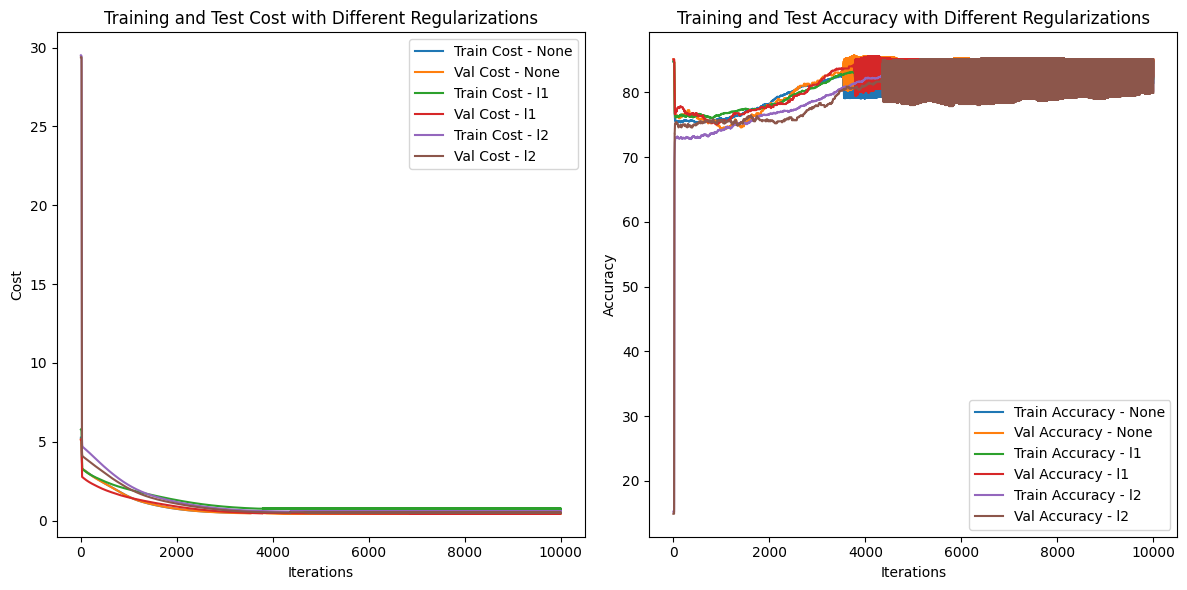

In [ ]:
def plot_results(results):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    for reg, result in results.items():
        plt.plot(result['cost_train'], label=f'Train Cost - {reg}')
        plt.plot(result['cost_test'], label=f'Val Cost - {reg}')

    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Training and Test Cost with Different Regularizations')
    plt.legend()

    plt.subplot(1, 2, 2)
    for reg, result in results.items():
        plt.plot(result['acc_train'], label=f'Train Accuracy - {reg}')
        plt.plot(result['acc_test'], label=f'Val Accuracy - {reg}')

    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy with Different Regularizations')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(results)


In [ ]:
iterations = 10000
learning_rate = 0.5 / iterations
lambda_ = 0.1
early_stopping_rounds = 5000

configs = [
    {'regularization': None, 'lambda_': lambda_, 'early_stopping': early_stopping_rounds},
    {'regularization': 'l1', 'lambda_': lambda_, 'early_stopping': early_stopping_rounds},
    {'regularization': 'l2', 'lambda_': lambda_, 'early_stopping': early_stopping_rounds}
]

results = {}

for config in configs:
    reg = config['regularization']
    lamb = config['lambda_']
    early_stop = config['early_stopping']

    print(f"Training with learning_rate={learning_rate}, regularization={reg}, lambda_={lamb}, early_stopping={early_stop}")

    W, B, cost_train_list, cost_test_list, acc_train_list, acc_test_list = model(
        X_train, Y_train, X_test, Y_test, learning_rate, iterations,
        early_stopping_rounds=early_stop, regularization=reg, lambda_=lamb
    )

    results[reg] = {
        'cost_train': cost_train_list,
        'cost_test': cost_test_list,
        'acc_train': acc_train_list,
        'acc_test': acc_test_list
    }

Training with learning_rate=5e-05, regularization=None, lambda_=0.1, early_stopping=5000
Iteration 0: Training cost = 5.263495256405808, Test cost = 5.15099490975905
Iteration 1000: Training cost = 2.5030537527458594, Test cost = 2.2234080613301277
Iteration 2000: Training cost = 2.023733428888001, Test cost = 1.774655987162426
Iteration 3000: Training cost = 1.7965491738638284, Test cost = 1.5619524986329762
Iteration 4000: Training cost = 1.643152960136708, Test cost = 1.4258772557797021
Iteration 5000: Training cost = 1.5150338130149967, Test cost = 1.3156028850832087
Iteration 6000: Training cost = 1.3974705355691144, Test cost = 1.2159763995053214
Iteration 7000: Training cost = 1.2863615592139723, Test cost = 1.122108858242591
Iteration 8000: Training cost = 1.1803829052609287, Test cost = 1.0327706802113723
Iteration 9000: Training cost = 1.0791052399369387, Test cost = 0.9477168923522122
Training with learning_rate=5e-05, regularization=l1, lambda_=0.1, early_stopping=5000
Iter

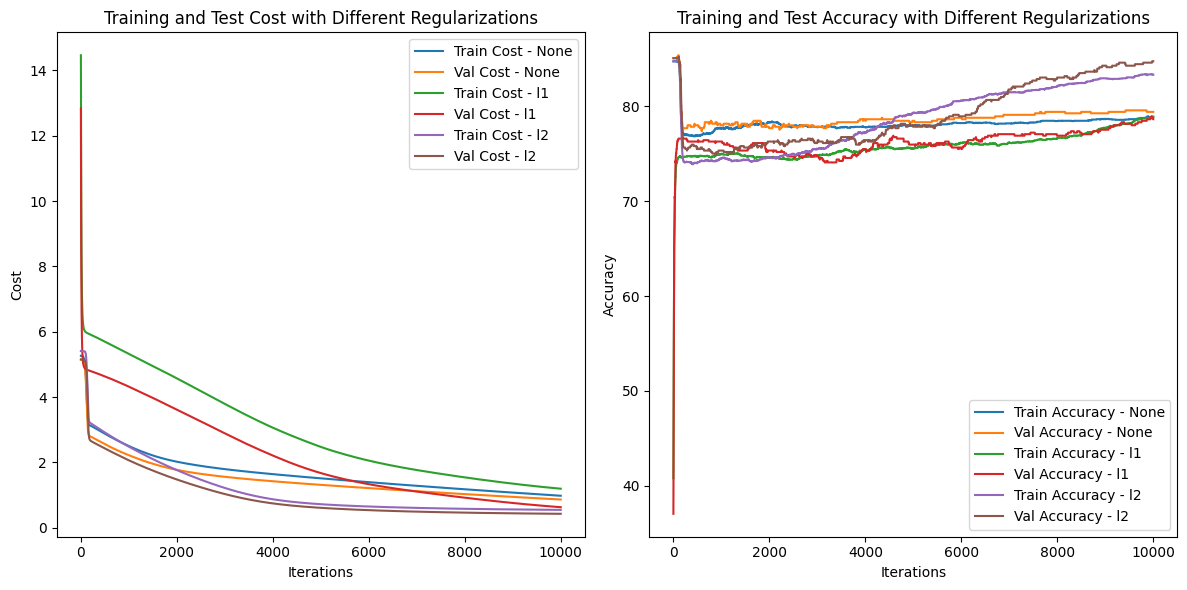

In [ ]:
plot_results(results)